In [15]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_csv("train-bank-campaign-data.csv")

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_var
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,65790
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55643
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,66189
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,70807
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,42625


In [18]:
stats = data.describe().T
stats['unique'] = [len(data[column].unique()) for column in stats.index]
stats['null'] = [data[column].isnull().sum() for column in stats.index]
stats['unknown'] = [(data[column] == "unknown").sum() for column in stats.index]
stats

C:\Users\Yailin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,count,mean,std,min,25%,50%,75%,max,unique,null,unknown
age,37084.0,40.042714,10.432965,17.000,32.000,38.000,47.000,98.000,77,0,0
duration,37084.0,258.237946,258.730909,0.000,102.000,180.000,319.250,4918.000,1509,0,0
campaign,37084.0,2.569545,2.770611,1.000,1.000,2.000,3.000,56.000,42,0,0
pdays,37084.0,962.530849,186.773063,0.000,999.000,999.000,999.000,999.000,27,0,0
previous,37084.0,0.172986,0.495681,0.000,0.000,0.000,0.000,7.000,8,0,0
emp.var.rate,37084.0,0.082669,1.568997,-3.400,-1.800,1.100,1.400,1.400,10,0,0
cons.price.idx,37084.0,93.576076,0.578493,92.201,93.075,93.749,93.994,94.767,26,0,0
cons.conf.idx,37084.0,-40.505183,4.622045,-50.800,-42.700,-41.800,-36.400,-26.900,26,0,0
euribor3m,37084.0,3.621668,1.733972,0.634,1.344,4.857,4.961,5.045,314,0,0
nr.employed,37084.0,5167.058664,72.196605,4963.600,5099.100,5191.000,5228.100,5228.100,11,0,0


In [19]:
cat_stats = data.describe(include=['object']).T
cat_stats['null'] = [data[column].isnull().sum() for column in cat_stats.index]
cat_stats['unknown'] = [(data[column] == "unknown").sum() for column in cat_stats.index]
cat_stats

,count,unique,top,freq,null,unknown
job,37084,12,admin.,9420,0,306
marital,37084,4,married,22479,0,72
education,37084,8,university.degree,10971,0,1549
default,37084,3,no,29382,0,7700
housing,37084,3,yes,19433,0,882
loan,37084,3,no,30561,0,882
contact,37084,2,cellular,23522,0,0
month,37084,10,may,12420,0,0
day_of_week,37084,5,thu,7778,0,0
poutcome,37084,3,nonexistent,32023,0,0


What does all this information tell us?

1) There is not null values

2) We can see which columns don't contain useful information for our predictions:
* The id_var column contains a unique identifier for each row and will not be useful for prediction
* The duration column is the last contact duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3) The column y is categorical, so we have to transform it to numerical.

4) We should analyze the correlation of numerical features and delete the columns highly correlated.

5) Transform categorical features to numerical using one-hot encode (get_dummmies)

6) There are some categorical columns that contain "unknown" values. One option is after transform these, delete the columns referring to the "unknown".

In [20]:
data.drop(columns = ['id_var', 'duration'], inplace = True)

In [21]:
# Label Encoding
data['target'] = np.where(data['y'] == "yes", 1, 0)
data.drop(columns = 'y', inplace = True)

In [22]:
data.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
age,1.000000,0.002777,-0.035689,0.022897,-0.000099,0.002773,0.129262,0.010845,-0.018226,0.031556
campaign,0.002777,1.000000,0.052624,-0.078300,0.150390,0.126598,-0.012388,0.134640,0.143609,-0.067347
pdays,-0.035689,0.052624,1.000000,-0.586728,0.271053,0.078072,-0.089587,0.297038,0.372449,-0.326596
previous,0.022897,-0.078300,-0.586728,1.000000,-0.418880,-0.200008,-0.052069,-0.453220,-0.500861,0.231399
emp.var.rate,-0.000099,0.150390,0.271053,-0.418880,1.000000,0.774727,0.199778,0.972243,0.906857,-0.300251
cons.price.idx,0.002773,0.126598,0.078072,-0.200008,0.774727,1.000000,0.062526,0.687433,0.521010,-0.136254
cons.conf.idx,0.129262,-0.012388,-0.089587,-0.052069,0.199778,0.062526,1.000000,0.280493,0.102931,0.054539
euribor3m,0.010845,0.134640,0.297038,-0.453220,0.972243,0.687433,0.280493,1.000000,0.945145,-0.309777
nr.employed,-0.018226,0.143609,0.372449,-0.500861,0.906857,0.521010,0.102931,0.945145,1.000000,-0.356735
target,0.031556,-0.067347,-0.326596,0.231399,-0.300251,-0.136254,0.054539,-0.309777,-0.356735,1.000000


In [23]:
# copy and paste the supervised learning - binary classification class (david)

In [25]:
cat_data = data.select_dtypes(include=['object']).copy()

In [26]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
1,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent
2,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent
3,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
4,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent


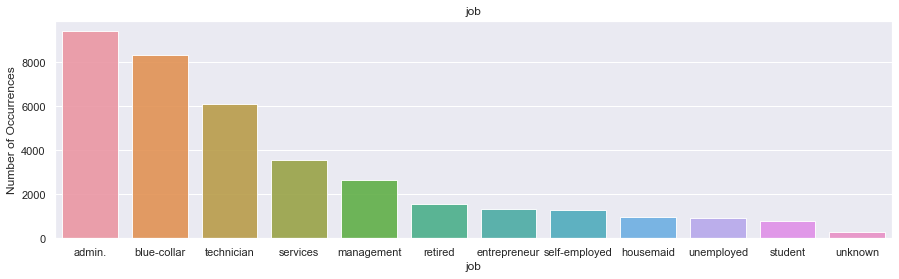

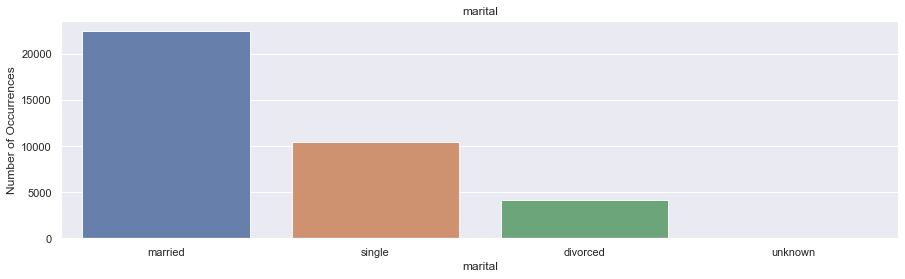

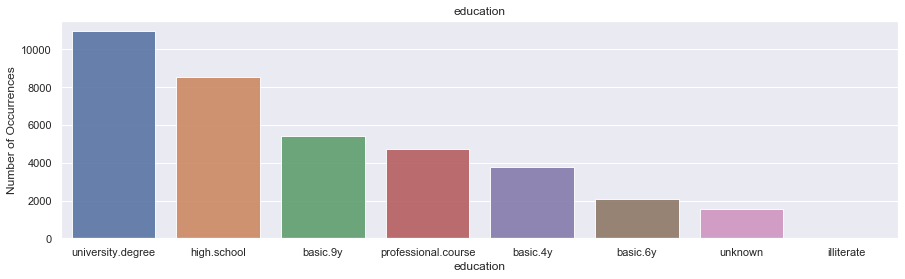

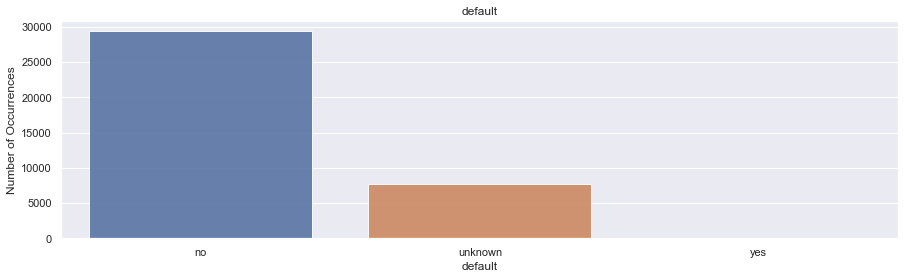

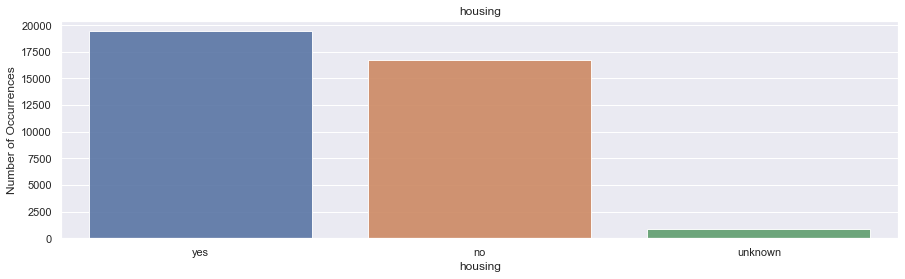

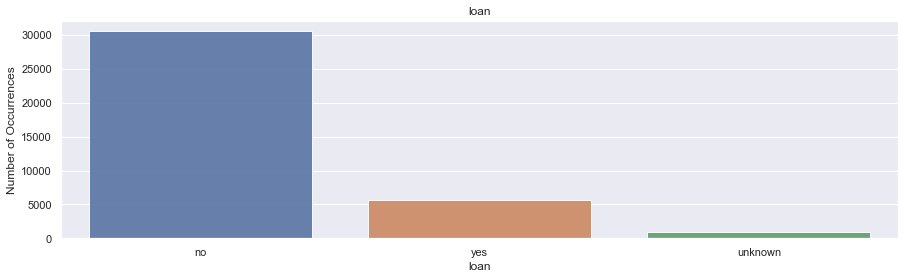

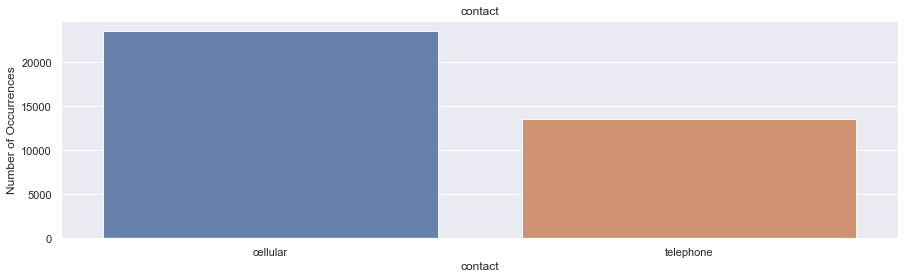

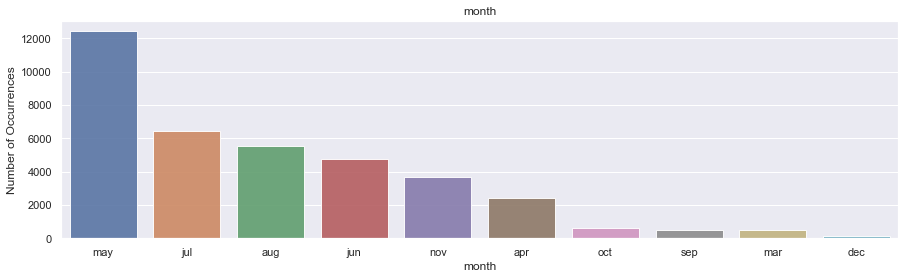

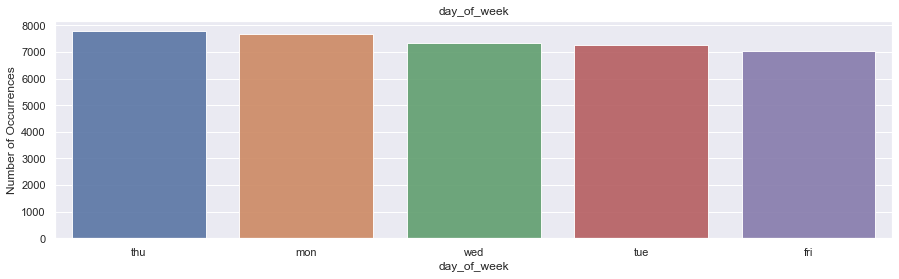

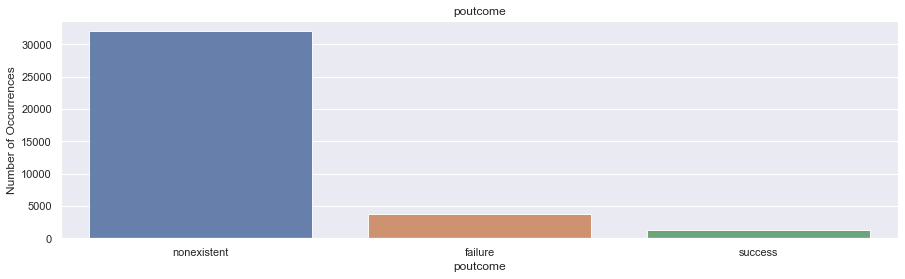

In [27]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

for column in cat_data:
    count = cat_data[column].value_counts()
    sns.set(style="darkgrid")
    f, axes = plt.subplots(1,1, figsize=(15, 4), sharex=True)
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title(column)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.show()

In [0]:
# import matplotlib.pyplot as plt
# plt.scatter(data['nr.employed'], data['euribor3m'])
# plt.show()

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="nr.employed", y="euribor3m", hue="age" data=data)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

KeyboardInterrupt: 